<a href="https://colab.research.google.com/github/MrH101/facebook-prophet/blob/main/fbphroph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.simplefilter("ignore")

In [4]:
import pandas as pd
import prophet as prophet

In [5]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset.csv')

In [6]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


from matplotlib import pyplot as plt
_df_0['Time Date'].plot(kind='hist', bins=20, title='Time Date')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Value'].plot(kind='hist', bins=20, title='Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Time Date', y='Value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time Date']
  ys = series['Value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Time Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time Date')
_ = plt.ylabel('Value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Time Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Time Date'}, axis=1)
              .sort_values('Time Date', ascending=True))
  xs = counted['Time Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Time Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Product']
  ys = series['Value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Product', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Product')
_ = plt.ylabel('Value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Product']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Product'}, axis=1)
              .sort_values('Product', ascending=True))
  xs = counted['Product']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Product', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Product')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['Time Date'].plot(kind='line', figsize=(8, 4), title='Time Date')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Value'].plot(kind='line', figsize=(8, 4), title='Value')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [8]:
print(df['Product'].unique())
print(df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


In [9]:
df['Year']=df['Time Date'].apply(lambda x:str(x)[-4:])
df['Month']=df['Time Date'].apply(lambda x:str(x)[-6:-4])
df['Day']=df['Time Date'].apply(lambda x:str(x)[:-6])
df['ds']=pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [10]:
df.drop(['Time Date','Product','Store','Year','Day','Month'], axis=1 ,inplace=True)
df.columns=['y','ds']

In [11]:
df.columns=['y','ds']

In [12]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


from matplotlib import pyplot as plt
_df_9['y'].plot(kind='hist', bins=20, title='y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['y']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('y')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ds']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ds'}, axis=1)
              .sort_values('ds', ascending=True))
  xs = counted['ds']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['y'].plot(kind='line', figsize=(8, 4), title='y')
plt.gca().spines[['top', 'right']].set_visible(False)

In [14]:
m=prophet.Prophet(interval_width= 0.95,daily_seasonality=True)
model=m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7azsl9ny/1_1gs8tw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7azsl9ny/nw7sq3ke.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16084', 'data', 'file=/tmp/tmp7azsl9ny/1_1gs8tw.json', 'init=/tmp/tmp7azsl9ny/nw7sq3ke.json', 'output', 'file=/tmp/tmp7azsl9ny/prophet_modeld98sagc5/prophet_model-20241007193515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:35:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:35:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [15]:
future=m.make_future_dataframe(periods=100,freq='D')
forecast=m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.771182,923.510526,3887.017820,3041.771182,3041.771182,-640.520201,-640.520201,-640.520201,468.866564,...,16.599243,16.599243,16.599243,-1125.986008,-1125.986008,-1125.986008,0.0,0.0,0.0,2401.250981
1,2018-01-02,3042.521656,715.973825,3968.136066,3042.521656,3042.521656,-650.771051,-650.771051,-650.771051,468.866564,...,-11.296388,-11.296388,-11.296388,-1108.341227,-1108.341227,-1108.341227,0.0,0.0,0.0,2391.750605
2,2018-01-03,3043.272131,808.993108,4038.728983,3043.272131,3043.272131,-625.066377,-625.066377,-625.066377,468.866564,...,-4.417865,-4.417865,-4.417865,-1089.515076,-1089.515076,-1089.515076,0.0,0.0,0.0,2418.205755
3,2018-01-04,3044.022606,836.782088,4048.674561,3044.022606,3044.022606,-578.237548,-578.237548,-578.237548,468.866564,...,22.477984,22.477984,22.477984,-1069.582096,-1069.582096,-1069.582096,0.0,0.0,0.0,2465.785058
4,2018-01-05,3044.773081,849.716327,4016.718558,3044.773081,3044.773081,-614.374860,-614.374860,-614.374860,468.866564,...,-34.571885,-34.571885,-34.571885,-1048.669539,-1048.669539,-1048.669539,0.0,0.0,0.0,2430.398221


In [16]:
forecast[['ds','yhat']]

,ds,yhat
0,2018-01-01,2401.250981
1,2018-01-02,2391.750605
2,2018-01-03,2418.205755
3,2018-01-04,2465.785058
4,2018-01-05,2430.398221
...,...,...
1175,2021-03-22,3722.674528
1176,2021-03-23,3706.287227
1177,2021-03-24,3721.897239
1178,2021-03-25,3754.165011


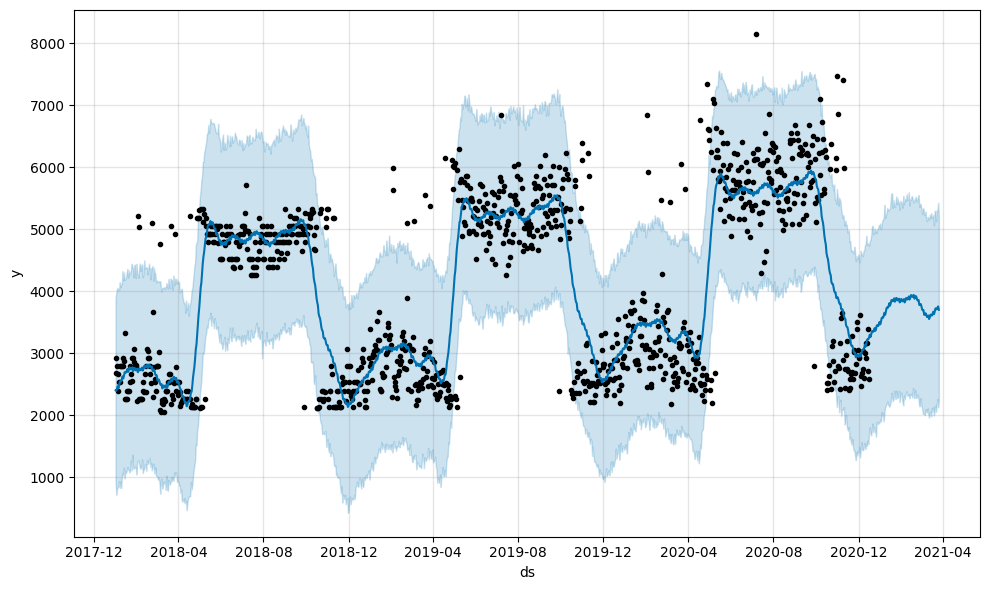

In [17]:
plot1=m.plot(forecast)

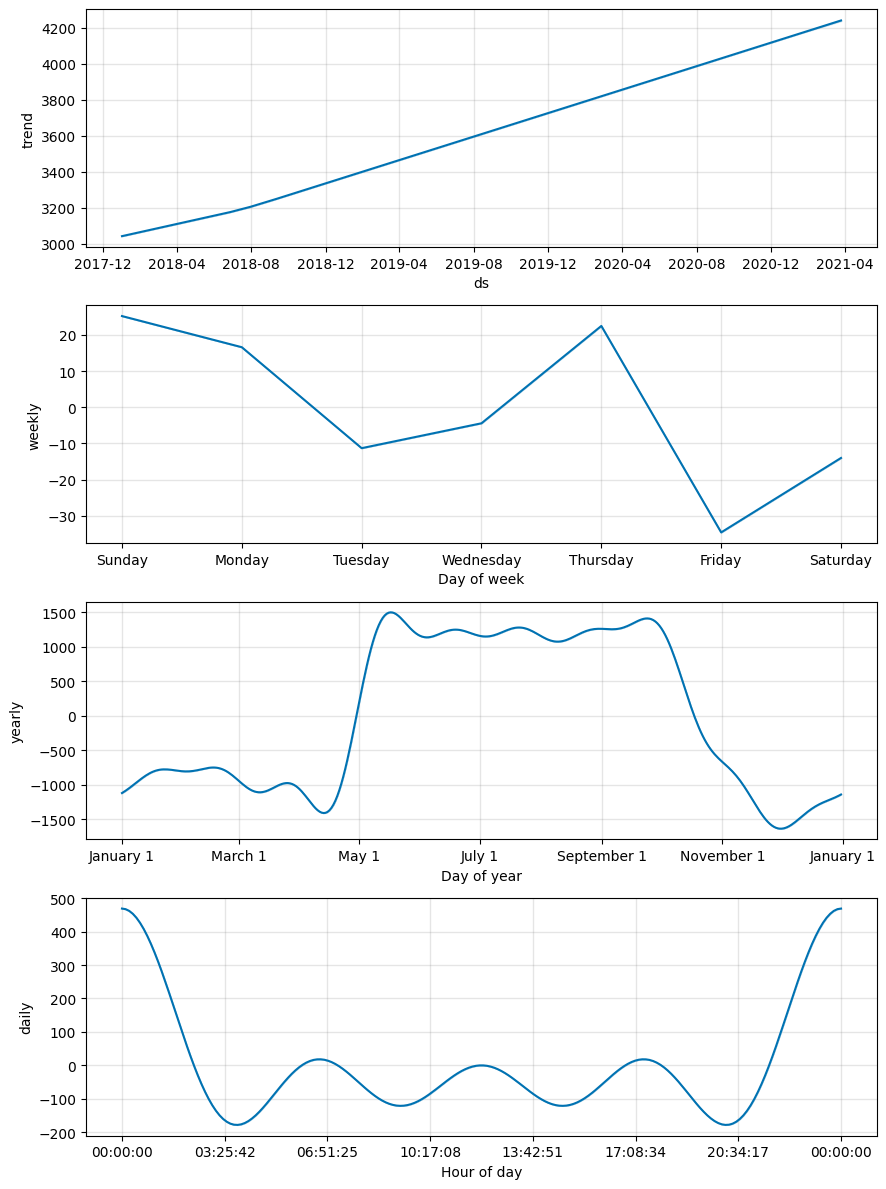

In [18]:
fig2 = m.plot_components(forecast)